# MyND Offline Processing: Data Analysis
Author: Geeling Chau<br> 
<br>
Description: Visualize power bin features<br>
Sources: 
- Ollie's Segment Speller Offline Processing Code https://github.com/ollie-d/SegSpeller/blob/master/Offline%20Processing.ipynb 
- neurodsp https://github.com/neurodsp-tools/neurodsp
- FOOOF https://fooof-tools.github.io/fooof/index.html 
- PyEEG http://pyeeg.sourceforge.net/ 


## Imports

In [10]:
from helperFunctions import *
from constants import *
from dataAnalysisFunctions import *

from neurodsp.plts.spectral import *

import sys


import warnings
warnings.filterwarnings('ignore')

## Data imports

In [11]:
filename_foldername_dict_path = "../data/most_currently_updated.pickle"
filename_foldername_dict = loadPickle(filename_foldername_dict_path)

foldername=filename_foldername_dict["foldername"]
filename=filename_foldername_dict["filename"]
print(foldername, filename)

dataframe_directory = "../data/dataframe/"+foldername+"/"
dataframe_path = dataframe_directory+filename+".pickle"

df = loadPickle(dataframe_path)

P005 participant_P005_exp001_block_long


In [12]:
filtered_cleaned_data_directory = "../data/filtered_cleaned_data/"+foldername+"/"
filtered_cleaned_data_path = filtered_cleaned_data_directory+filename+".pickle"

filtered_cleaned_data = loadPickle(filtered_cleaned_data_path)

In [13]:
## Get the person's Alpha and Theta bands
## Use that to see if the PSDs have any difference

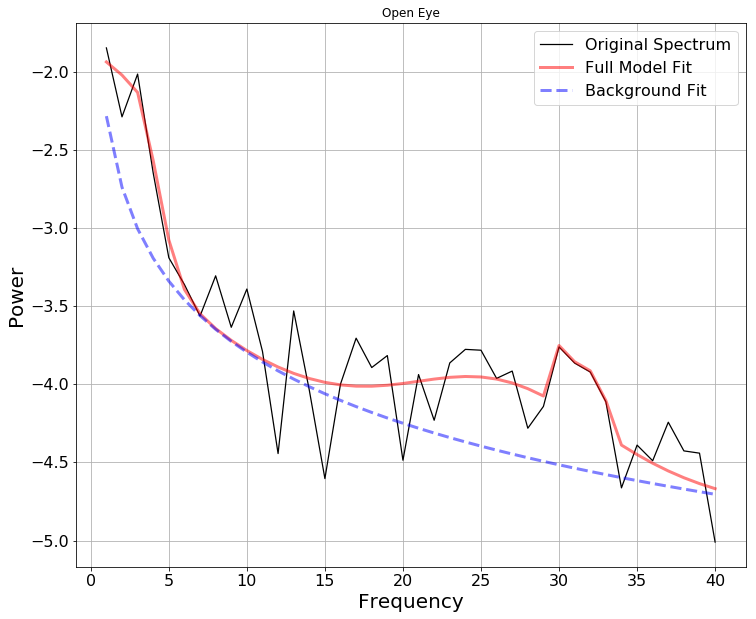

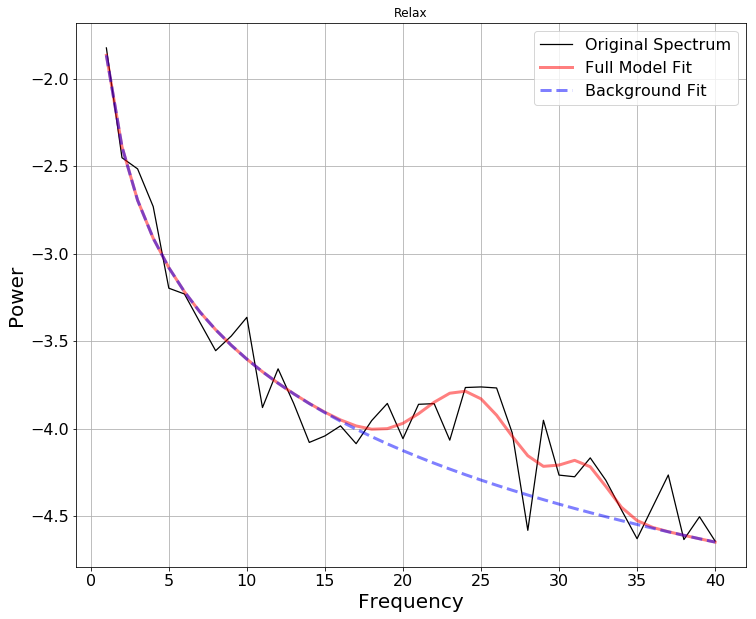

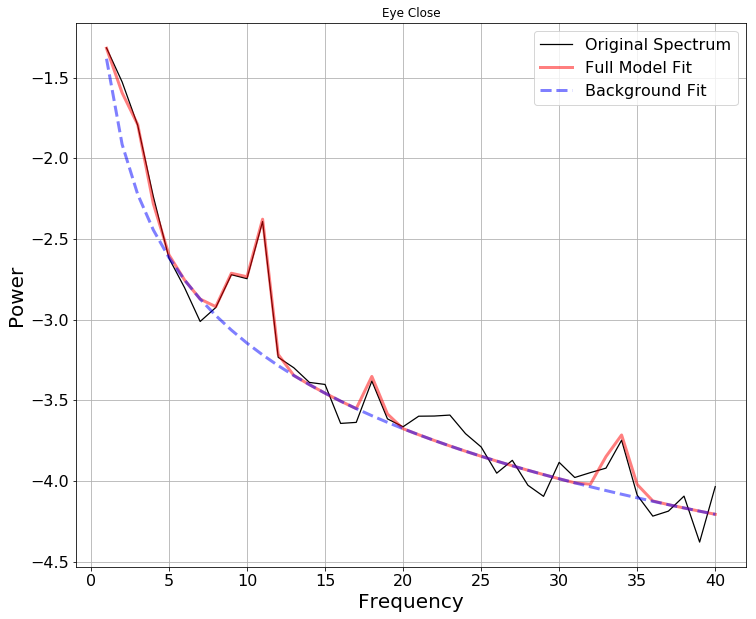

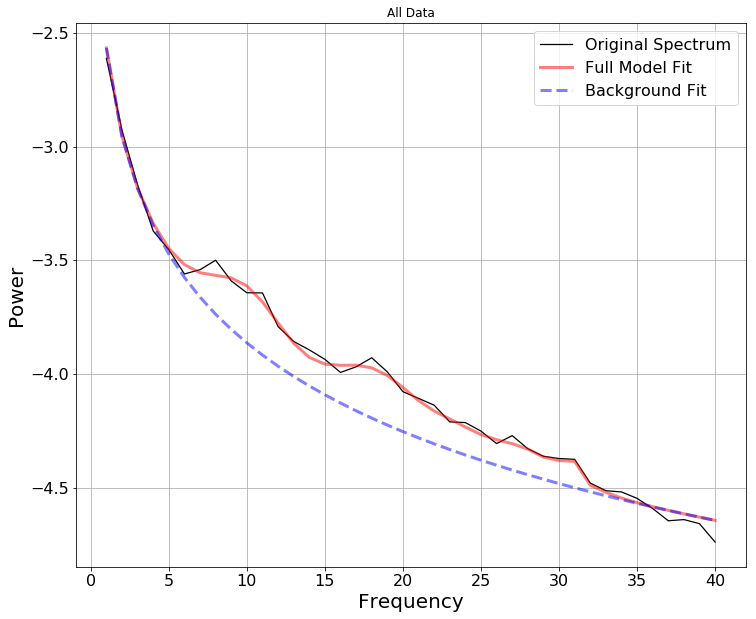

In [32]:
try:
    data_open_eyes, index, index_sub = getMarkerBoundSingleMarkerData('Stare there --> <-- for 5 secs\nthen Press Space', '--SpacePressed',  filtered_cleaned_data, go_backward=True)
    data_relax, index, index_sub = getMarkerBoundSingleMarkerData('Relax for at least 5 secs\n\nthen Press Space', '--SpacePressed',  filtered_cleaned_data, go_backward=True)
    data_close_eyes, index, index_sub = getMarkerBoundSingleMarkerData('Close your eyes for 5 secs\n\nthen Press Space', '--SpacePressed',  filtered_cleaned_data, go_backward=True)
    data_list = [data_open_eyes[0], data_relax[0], data_close_eyes[0], filtered_cleaned_data]
    data_titles = ["Open Eye", "Relax", "Eye Close", "All Data"]
    eeg_list = getEEGFromDataList_AvgLeftRight(data_list)
    fits = getFOOOFFits(eeg_list, 250, (1,40))
    for i, fit in enumerate(fits) :
        fit.plot() 
        plt.title(data_titles[i])
        plt.show()
except: 
    print("Unexpected error:", sys.exc_info()[0])
    raise
    print("Check")
    # First 20 markers 
    # Useful for identifying data from calibration phase
    print("calibration markers:\n\n",filtered_cleaned_data[StreamType.MARKER.value][StreamType.DATA.value][:20])



1

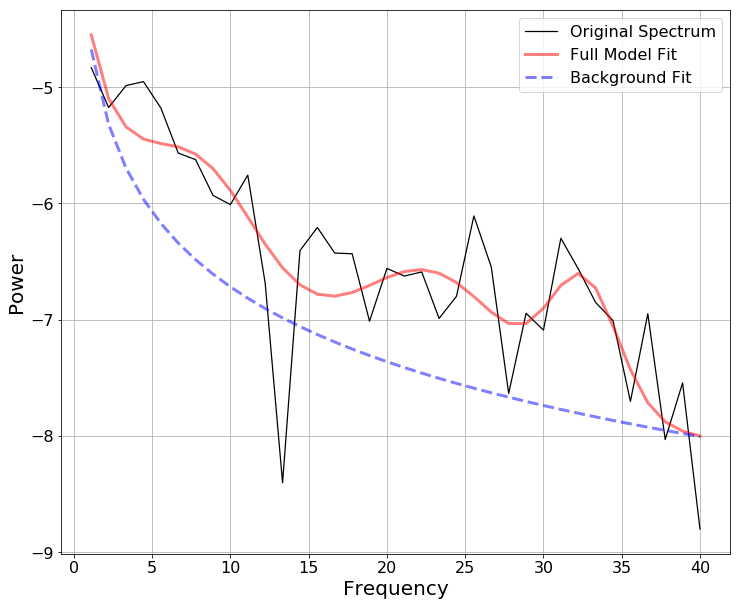

In [40]:
# Average trials, then fit FOOOF
eeg_list = tidyEEGList(getEEGFromDataFrame_AvgLeftRight(df))
average_list = np.mean(eeg_list, axis=0)
fit = getFOOOFFits([average_list], 250, (1,40))
fit[0].plot()
len(fit)

In [ ]:
# Window and average? Average across trials? 